In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 单变量

In [2]:
data = pd.read_csv('./ex1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='population', ylabel='profit'>

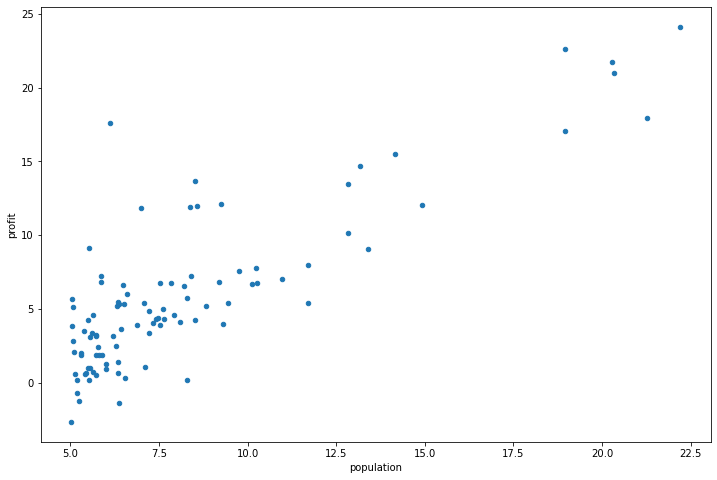

In [4]:
# 绘制散点图
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))

In [5]:
# 构造X，y
X = data['population'].values
y = data['profit'].values.reshape(X.shape[0],1)   # y.type = <class 'numpy.ndarray'> ;y.shape = (97,)  why??
X = np.expand_dims(X, axis=1)   # 维度扩展 X.shape = (97,) ->(97,1)
X = np.insert(X,0,1,axis=1)     # X.shape = (97,1) -> (97,2)
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### 模型定义

#### 假设函数

$$h_\theta(x)=\theta^TX=\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

#### 损失函数

$$J(\theta)=\frac{1}{2m}\displaystyle \sum{(h_\theta(x^{(i)})-y^{(i)})^2}$$

#### 备注：
上标(i):表示第i个样本  
下标j:表示第j列  
$x^{(i)}_j$ : 表示第i个样本中第j个属性的值

#### numpy两种向量乘法
1. multiply表示两个向量的对应元素相乘，生成结果向量对应位置的元素，结果是向量
2. dot表示两个向量的对应元素相乘的结果相加，最后结果是一个标量

#### numpy知识补充
1. numpy有两种数据结构：matrix和array，matrix是array的一个分支
2. matrix的优势就是可以使用简单的数学符号，比如，matrix使用【*】，array使用dot；array更加强大和灵活

In [6]:
# Linear hypothesis function
def h(X,theta):
    return np.dot(X,theta)
def computeCost(X, y, theta):
    """
    X.shape = (n,m) 
    y.shape = (n,1)
    theta.shape = (m,1)
    """
    return float((1.0/(2*X.shape[0])) * np.dot((h(X,theta) - y).T,(h(X,theta) - y)))

In [7]:
initial_theta = np.zeros((X.shape[1],1))
print(X.shape,initial_theta.shape,y.shape,)
computeCost(X,y,initial_theta)

(97, 2) (2, 1) (97, 1)


32.07273387745567

#### 梯度下降

$$\theta_j=\theta_j -\alpha\frac{\partial}{\partial \theta_j}J(\theta)$$

$$\theta_j=\theta_j-\frac{\alpha}{m}\displaystyle \sum{(h_\theta x^{(i)}-y^{(i)})x^{(i)}_j}$$

In [9]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        temp_theta = theta
        for j in range(theta.shape[0]):
            temp_theta[j] = theta[j] - alpha/X.shape[0] * np.sum(np.multiply(h(X,theta) - y,X[:,j].reshape(X.shape[0],1)))
        theta = temp_theta
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [10]:
iters = 1500
alpha = 0.01
theta,cost = gradientDescent(X,y,initial_theta,alpha,iters)

In [11]:
theta

array([[-3.63606348],
       [ 1.16698916]])

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

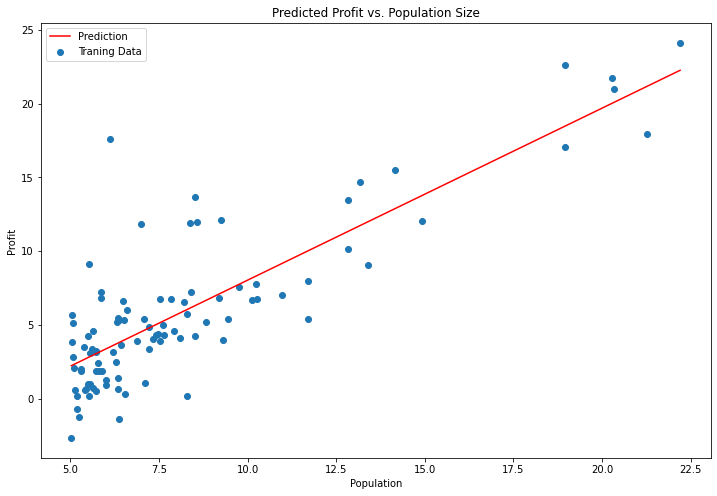

In [12]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = theta[0, 0] + (theta[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=0)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

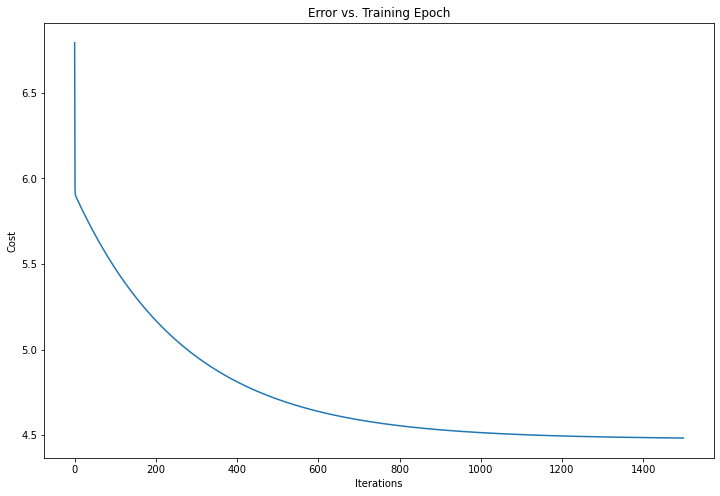

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost)
ax.set_xlabel("Iterations")
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()

# 多变量

In [15]:
data = pd.read_csv('./ex11.txt')
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [16]:
data.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


## 特征归一化

In [17]:
data = (data-data.mean())/data.std()   # 标准化，除以标准差
data.head()

,2104,3,399900
0,-0.495977,-0.226166,-0.073110
1,0.499874,-0.226166,0.236953
2,-0.725023,-1.526618,-0.849457
3,1.246762,1.074287,1.592190
4,-0.016724,1.074287,-0.311010


In [19]:
data.insert(0,'ones',1)   # DataFrame指定位置插入一列
data.head()

,ones,2104,3,399900
0,1,-0.495977,-0.226166,-0.073110
1,1,0.499874,-0.226166,0.236953
2,1,-0.725023,-1.526618,-0.849457
3,1,1.246762,1.074287,1.592190
4,1,-0.016724,1.074287,-0.311010


In [24]:
# 构造X，y
X = data.iloc[:,:3].values
X.shape

(46, 3)

In [25]:
y = data.iloc[:,-1:].values
y.shape

(46, 1)

In [29]:
initial_theta = np.zeros((X.shape[1],1))
print(X.shape,y.shape,initial_theta.shape)

(46, 3) (46, 1) (3, 1)


In [30]:
iters = 1500
alpha = 0.01
theta,cost = gradientDescent(X,y,initial_theta,alpha,iters)

In [31]:
theta

array([[ 8.97711857e-17],
       [ 8.83215185e-01],
       [-4.92016615e-02]])

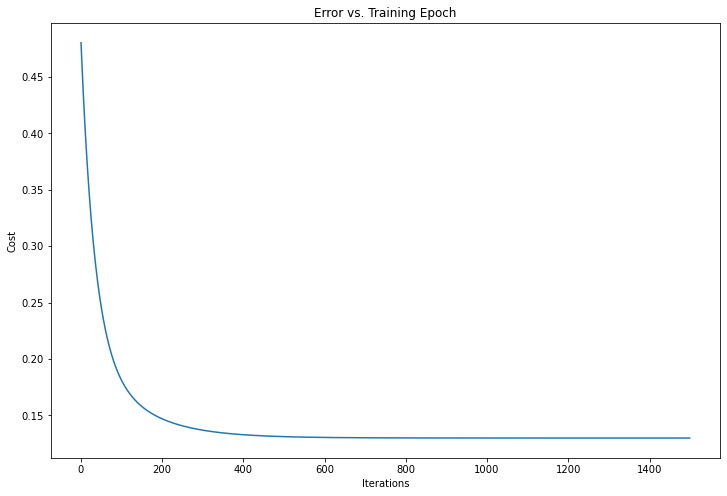

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost)
ax.set_xlabel("Iterations")
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()